# MNIST Datensatz handgeschriebener Ziffern 0-9

### Importieren von TensorFlow, Keras und Numpy

Neue Bibliotheken für diese Art der Datenanalyse: TensorFlow und Keras.
Keras bietet eine einfache Möglichkeit den MNIST-Datensatz zu laden, da dieser bereits als Benchmark-Datensatz in Keras integriert ist.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import Input
import seaborn as sns

### MNIST Datensatz laden

Trainingsdaten (Bilder + Label) und Testdaten (ebenso Bilder + Label)

In [ ]:
# Datensatz angeben
data = keras.datasets.mnist

# Datensatz herunterladen, Aufteilen der Daten in Test- und Trainingsdaten
(train_images, train_labels), (test_images, test_labels) = data.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Größe der Trainingsdaten (Länge, Höhe und Tiefe des Numpy-Arrays)
print('Training-Datensatz: ', train_images.shape)
# Größe der Testdaten (Länge, Höhe und Tiefe des Numpy-Arrays)
print('Test-Datensatz: ', test_images.shape)
# Informationsinhalte der Daten
print(f"Pixelwerte von {np.min(train_images)} bis {np.max(train_images)}.")

Training-Datensatz:  (60000, 28, 28)
Test-Datensatz:  (10000, 28, 28)
Pixelwerte von 0 bis 255.


In [ ]:
train_labels[10]

3

### Bilder aus dem Datensatz anzeigen


In [ ]:
import matplotlib.pyplot as plt
# Magischer Befehl für die Verwendung von matplotlib in lokalen jupyter notebooks
%matplotlib inline

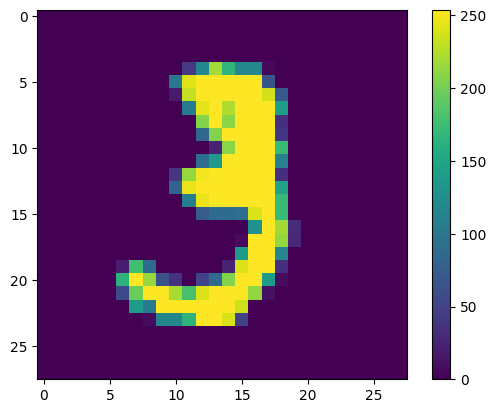

In [ ]:
plt.imshow(train_images[10])
plt.colorbar()
plt.show()

In [ ]:
normalized_train_images = train_images / 255

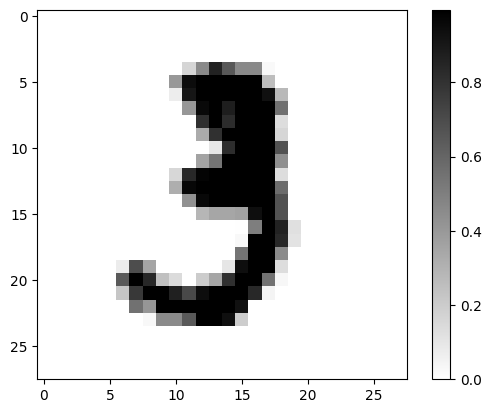

In [ ]:
# colormap (cmap) 'binary', zwischen weiß und schwarz interpolierend
plt.imshow(normalized_train_images[10], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

Text(0, 0.5, 'Häufigkeit')

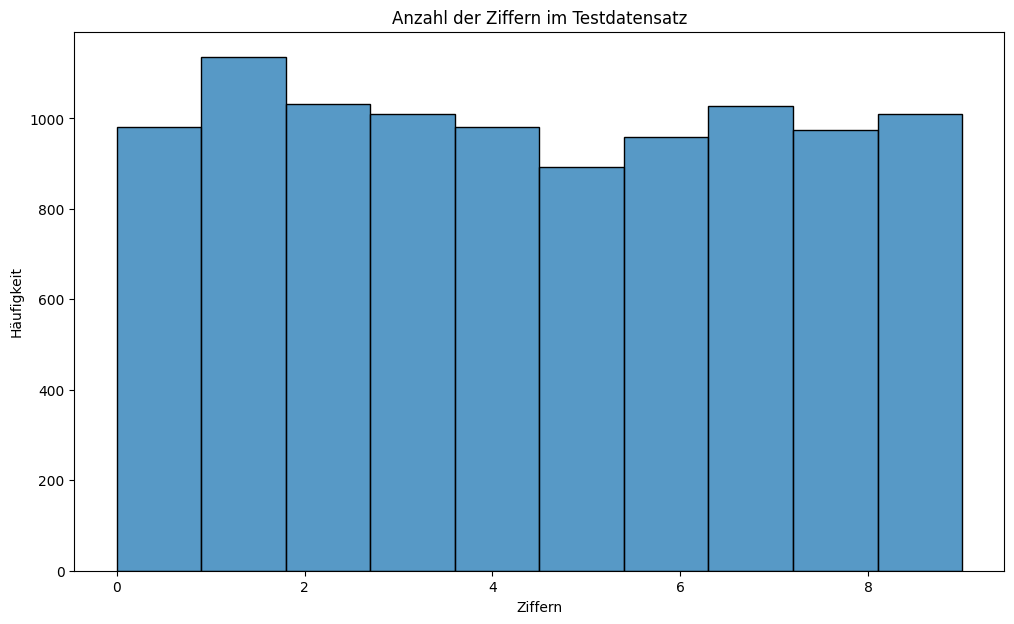

In [ ]:
# Visualisieren der Ziffernanzahl pro Klasse im Test-Datensatz
plt.figure(figsize=(12,7))
sns.histplot(test_labels, bins=10)
plt.title("Anzahl der Ziffern im Testdatensatz")
plt.xlabel('Ziffern')
plt.ylabel('Häufigkeit')

### Pre-Processing für die Verwendung von Keras


Alle Bilder haben ein Label, die Zuordnung zur der auf dem Bild dargestellten Zahl (z.B. 3). Die Ausgabe des ANN ist aber ein Vektor aus 10 Elementen (0-9), an dessen 4. Stelle eine 1 stehen muss, um die Zahl 3 zu codieren.

In [ ]:
# Label ist die Zahl der Klasse
print(f"Label davor: {train_labels[10]}")

total_classes = 10
# Hilfsfunktion zur Durchführung der Vektorisierung
train_vec_labels = keras.utils.to_categorical(train_labels, total_classes)
test_vec_labels = keras.utils.to_categorical(test_labels, total_classes)
print(f"Label danach: {train_vec_labels[10]}")

Label davor: 3
Label danach: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Entwurf eines Netzes

* sehr einfaches Netz mit 3 Layern definieren (Eingabelayer, Hidden Layer und Ausgabelayer)
* Input-Layer: keras.layers.Flatten Layer, der die 28x28 Matrizen auf  Neuronen verteilt
* Hidden-Layer: keras.layers.Dense Layer mit 128 Neuronen
* Output-Layer: keras.layers.Dense Layer mit 10 Neuronen, 10 Klassen (Ziffern von 0-9)

In [ ]:
model = keras.Sequential()
model.add(Input(shape=(28, 28)))  # Explizite Eingabeschicht
model.add(Flatten())
model.add(Dense(128, activation ='sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))

## Kompilieren des Models

* Parameter für die Trainingsphase festlegen
    * optimizer: Verbesserungsalgorithmus beim Lernen SGD = Stochastic Gradient Descent
    * Kostenfunktion: Mittlere Quadratische Abweichung
    * Metrik: Accuracy

In [ ]:
# sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=['accuracy'])

# Trainieren des Modells

10 Epochen = 10 Iterationen

In [ ]:
model1 = model.fit(train_images, train_vec_labels, epochs=10, verbose=True)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2801 - loss: 0.1142
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6190 - loss: 0.0649
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7192 - loss: 0.0536
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7794 - loss: 0.0461
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8137 - loss: 0.0409
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8346 - loss: 0.0371
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8484 - loss: 0.0342
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8623 - loss: 0.0316
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8707 - loss: 0.0296
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8752 - loss: 0.0281


# Modell evaluieren

In [ ]:
model1.history

{'accuracy': [0.4025999903678894,
  0.6518666744232178,
  0.7368500232696533,
  0.7876999974250793,
  0.8193333148956299,
  0.8401166796684265,
  0.852400004863739,
  0.8627166748046875,
  0.8704500198364258,
  0.8760499954223633],
 'loss': [0.08703896403312683,
  0.06164466589689255,
  0.05155862867832184,
  0.04477088525891304,
  0.03992966562509537,
  0.036275867372751236,
  0.0334521122276783,
  0.031187836080789566,
  0.029313240200281143,
  0.02778245322406292]}

In [ ]:
eval_loss, eval_accuracy = model.evaluate(test_images, test_vec_labels, verbose=False)
print("Model accuracy: %.2f" % eval_accuracy)

Model accuracy: 0.88


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

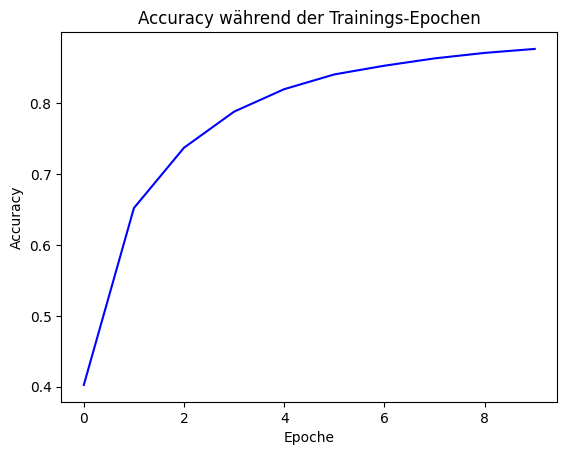

In [ ]:
# Plot der Fehlerabnahme
plt.plot(model1.history['accuracy'], color='b')
plt.title("Accuracy während der Trainings-Epochen")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
#plt.legend()
plt.show()

## Anwenden des Modells und Ergebnis-Evaluierung

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


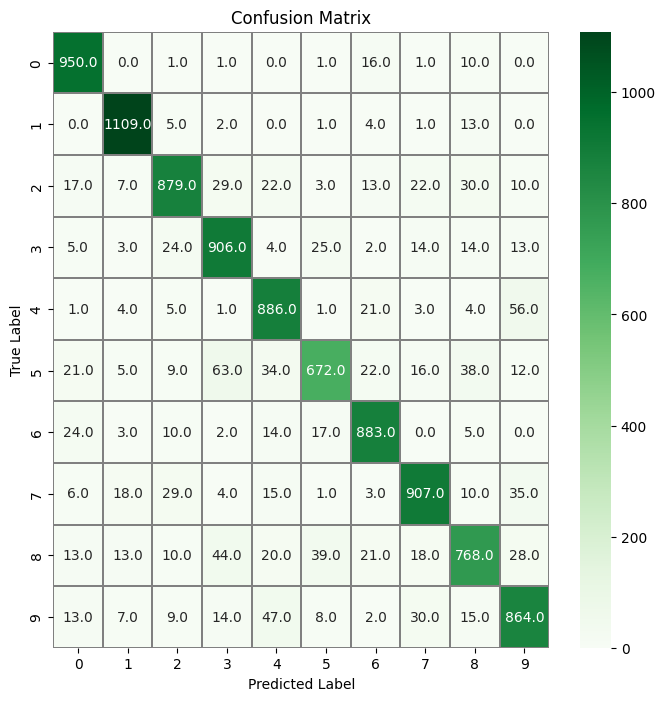

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_pred_classes
cm=confusion_matrix(test_labels,y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Wie sehen fehlerhaft erkannte Zahlen aus?

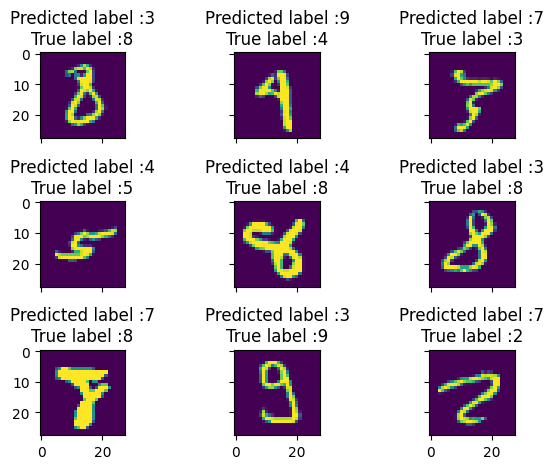

In [ ]:
# Fehler sind Unterschiede zwischen y_pred labels and den wahren labels
errors = (y_pred_classes - test_labels != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
test_labels_errors = test_labels[errors]
test_images_errors = test_images[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):

    n = 0
    nrows = 3
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
    fig.tight_layout()

# Wahrscheinlichkeit der falsch erkannten Zahl
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

# Vorhergesagte Wahrscheinlichkeit der wahren Zahl
true_prob_errors = np.diagonal(np.take(y_pred_errors, test_labels_errors, axis=1))

# Differenz der Wahrscheinlichkeiten
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sortieren der Differenzen
sorted_delta_errors = np.argsort(delta_pred_true_errors)

# Top 9 auswählen
most_important_errors = sorted_delta_errors[-9:]
display_errors(most_important_errors, test_images_errors, y_pred_classes_errors, test_labels_errors)

# There is room for improvement!

(E. Musk (2019), presenting the Tesla Cybertruck...)